In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import pickle
from sklearn.metrics import classification_report,confusion_matrix
plt.style.use('fivethirtyeight')
pd.set_option('display.max_rows',None)

In [58]:
# Reading the csv and printing its shape

df = pd.read_csv('emp_promotion.csv')
print('Shape of train data {}'.format(df.shape))

Shape of train data (54808, 14)


In [59]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [60]:
df['department'].unique()

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal'], dtype=object)

# Univariate analysis

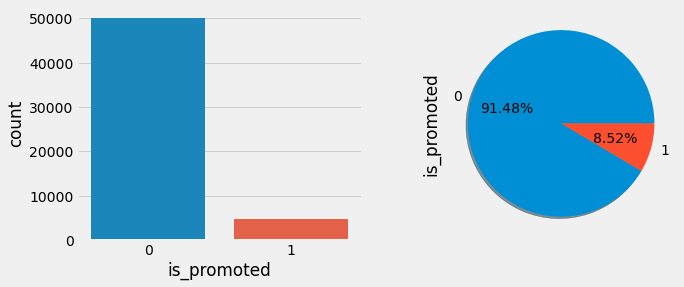

In [4]:
# Data is imbalanced

plt.figure(figsize=(10,4))
plt.subplot(121)
sns.countplot(df['is_promoted'])      
plt.subplot(122)
df['is_promoted'].value_counts().plot(kind='pie',autopct = '%.2f%%',shadow=True)
plt.show()

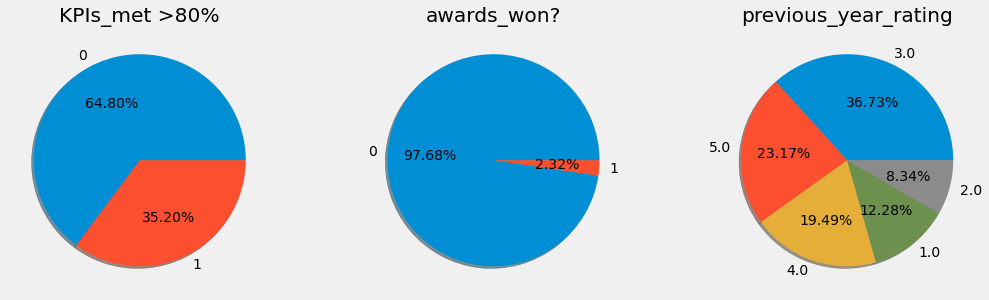

In [5]:
""" From the below graph we get a clear understanding that 97.68% employees have not won any awards. 
    Around 65% of employees have KPIs > 80%. More than 75% of employees have previous year rating > 3.0 """

plt.figure(figsize=(16,10))
plt.subplot(231)
plt.axis('off')
plt.title('KPIs_met >80%')
df['KPIs_met >80%'].value_counts().plot(kind='pie',shadow=True,autopct = '%.2f%%')
plt.subplot(232)
plt.axis('off')
plt.title('awards_won?')
df['awards_won?'].value_counts().plot(kind='pie',shadow=True,autopct = '%.2f%%')
plt.subplot(233)
plt.axis('off')
plt.title('previous_year_rating')
df['previous_year_rating'].value_counts().plot(kind='pie',shadow=True,autopct = '%.2f%%')
plt.show()

<AxesSubplot:xlabel='avg_training_score'>

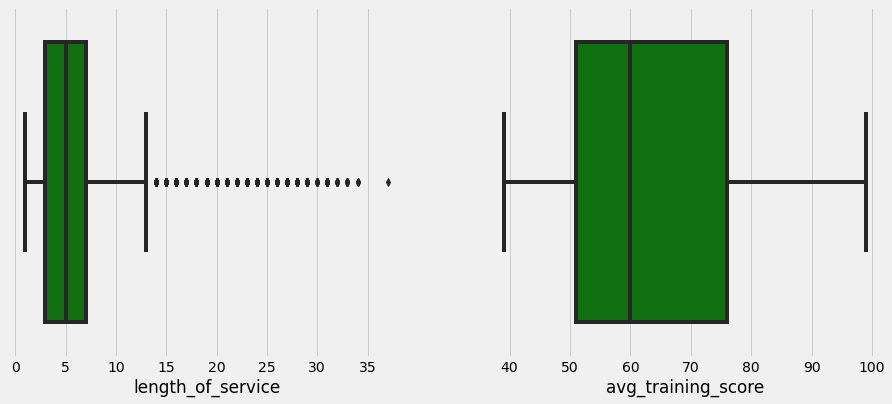

In [6]:
# Length of services column has outliers

plt.figure(figsize=(14,6))
plt.subplot(121)
sns.boxplot(df['length_of_service'],color='g')
plt.subplot(122)
sns.boxplot(df['avg_training_score'],color='g')

# Bivariate analysis

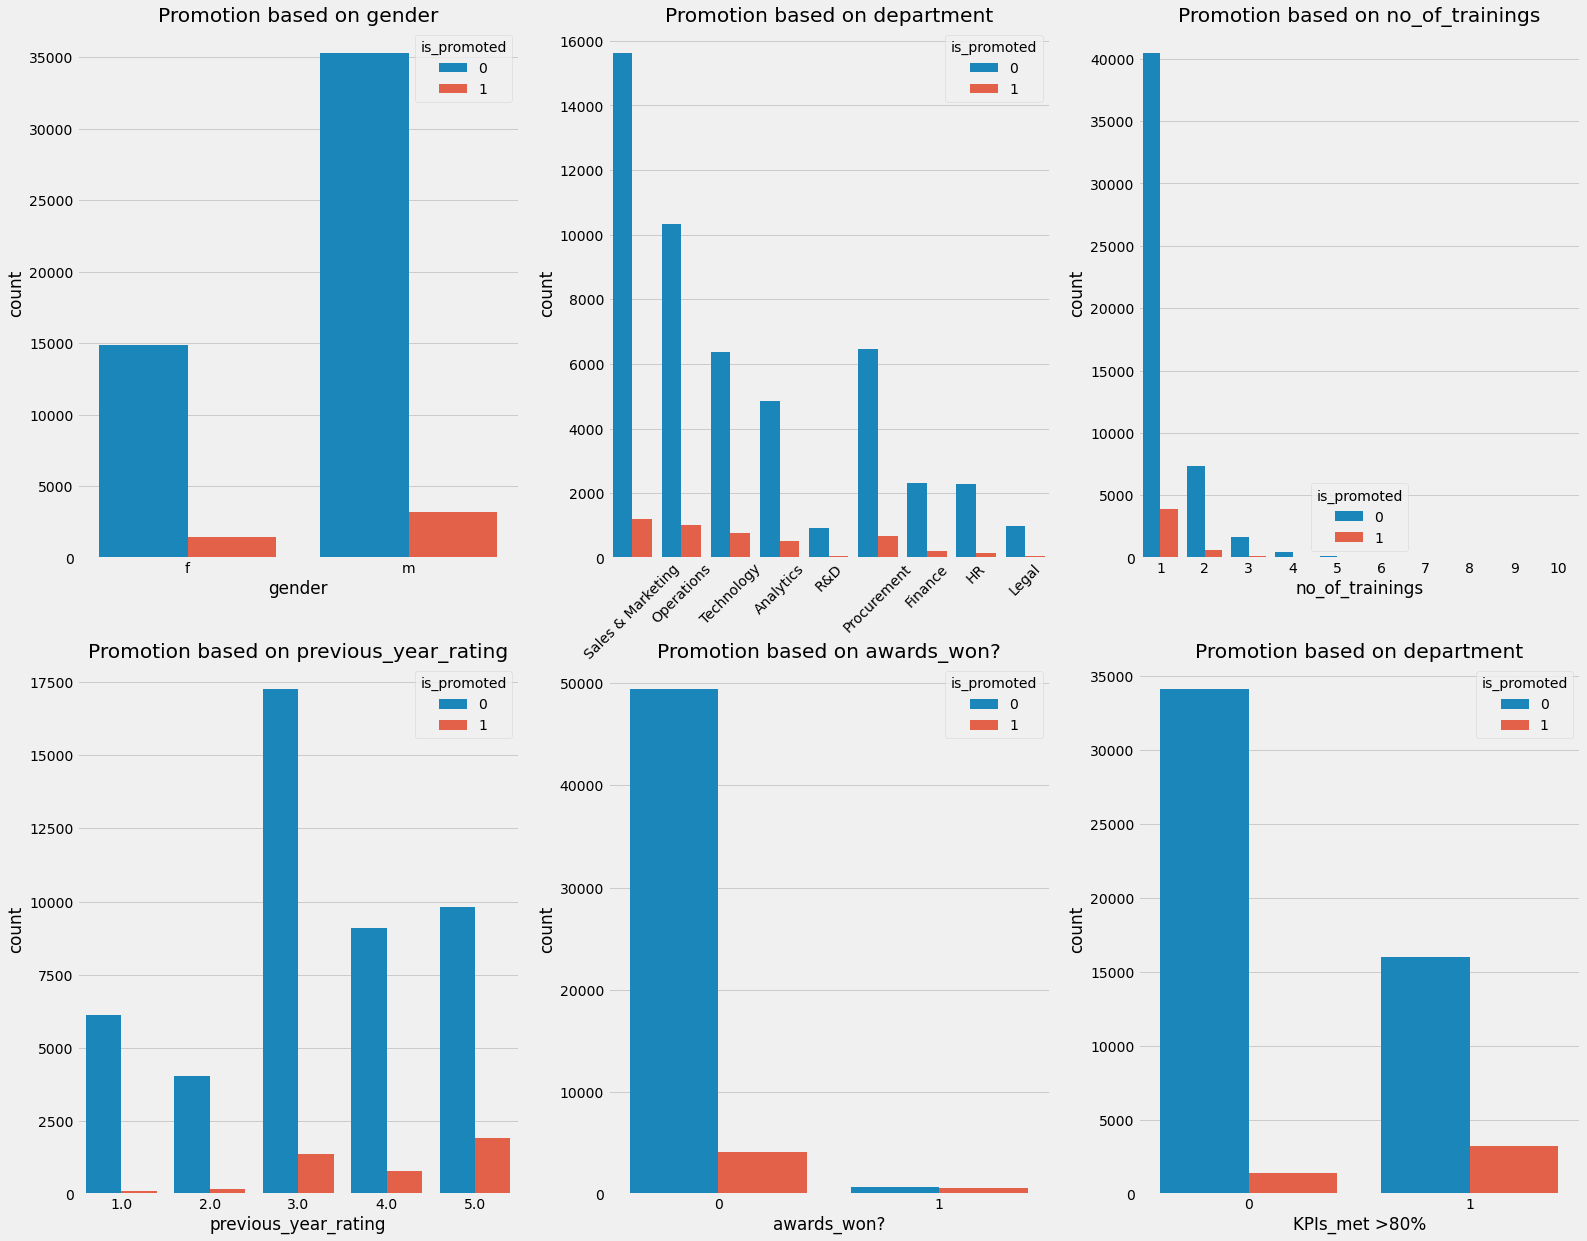

In [7]:
plt.figure(figsize=(24,20))
plt.subplot(231)
sns.countplot(df['gender'],hue=df['is_promoted'])
plt.title('Promotion based on gender')
plt.subplot(232)
plt.xticks(rotation=45)
sns.countplot(df['department'],hue=df['is_promoted'])
plt.title('Promotion based on department')
plt.subplot(233)
sns.countplot(df['no_of_trainings'],hue=df['is_promoted'])
plt.title('Promotion based on no_of_trainings')
plt.subplot(234)
sns.countplot(df['previous_year_rating'],hue=df['is_promoted'])
plt.title('Promotion based on previous_year_rating')
plt.subplot(235)
sns.countplot(df['awards_won?'],hue=df['is_promoted'])
plt.title('Promotion based on awards_won?')
plt.subplot(236)
sns.countplot(df['KPIs_met >80%'],hue=df['is_promoted'])
plt.title('Promotion based on department')
plt.show()

# Multivariate analysis

<AxesSubplot:xlabel='avg_training_score', ylabel='previous_year_rating'>

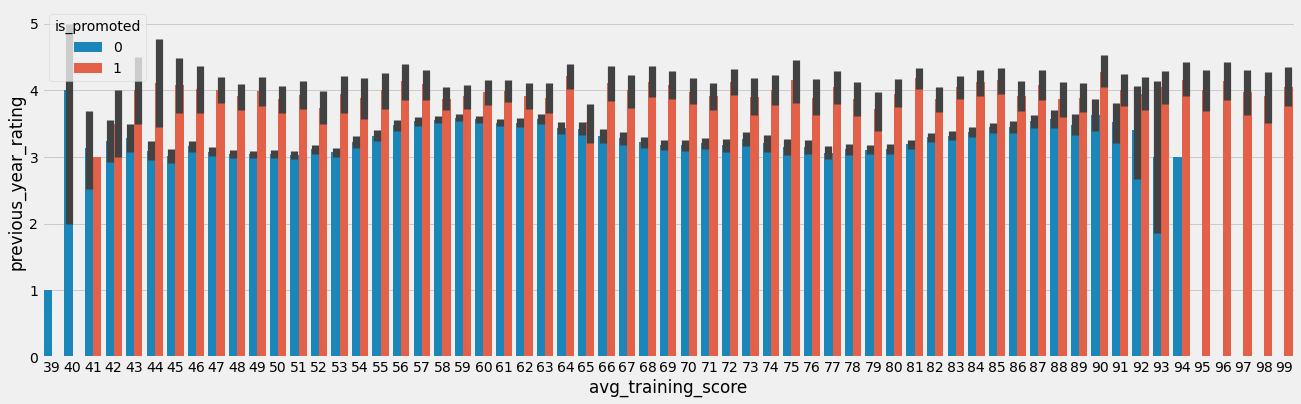

In [8]:
""" From the below bar plot, we came to know that employee with training score > 95 & previous year rating > 3 got promoted. """ 

plt.figure(figsize=(20,6))
sns.barplot(df['avg_training_score'],df['previous_year_rating'],df['is_promoted'])

# Descriptive statistics

In [35]:
df.describe(include='all')

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808,54808,52399,54808,54808,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
unique,NaN,9,34,3,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Sales & Marketing,region_2,Bachelor's,m,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,16840,12343,36669,38496,30446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,39195.830627,NaN,NaN,NaN,NaN,NaN,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,NaN,NaN,NaN,NaN,NaN,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,NaN,NaN,NaN,NaN,NaN,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,NaN,NaN,NaN,NaN,NaN,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,NaN,NaN,NaN,NaN,NaN,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000


# Data Pre-processing

In [36]:
""" To predict the promotion, employee id is not required and even sex feature is also not important. For promotion, 
region and recruitment channel is not important. So, removing employee id, sex, recruitment_channel and region"""

df = df.drop(['employee_id','gender','region','recruitment_channel'],axis=1)

In [5]:
df.head()

,department,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,Master's & above,1,35,5.0,8,1,0,49,0
1,Operations,Bachelor's,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,Bachelor's,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,Bachelor's,2,39,1.0,10,0,0,50,0
4,Technology,Bachelor's,1,45,3.0,2,0,0,73,0


In [37]:
df.isnull().sum()

department                 0
education               2409
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [38]:
# Replacing nan with mode

print(df['education'].value_counts())
df['education'] = df['education'].fillna(df['education'].mode()[0])

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64


In [39]:
# Replacing nan with mode

print(df['previous_year_rating'].value_counts())
df['previous_year_rating'] = df['previous_year_rating'].fillna(df['previous_year_rating'].mode()[0])

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   education             54808 non-null  object 
 2   no_of_trainings       54808 non-null  int64  
 3   age                   54808 non-null  int64  
 4   previous_year_rating  54808 non-null  float64
 5   length_of_service     54808 non-null  int64  
 6   KPIs_met >80%         54808 non-null  int64  
 7   awards_won?           54808 non-null  int64  
 8   avg_training_score    54808 non-null  int64  
 9   is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 4.2+ MB


In [41]:
# Finding the employee who got promoted even in poor performance. It affect model performance. 

negative=df[(df['KPIs_met >80%']==0) & (df['awards_won?']==0) & (df['previous_year_rating']==1.0) & 
         (df['is_promoted']==1) & (df['avg_training_score']<60)]
negative

,department,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
31860,Sales & Marketing,Bachelor's,1,27,1.0,2,0,0,58,1
51374,Sales & Marketing,Bachelor's,1,31,1.0,5,0,0,58,1


In [42]:
# Removing negative data

df.drop(index=[31860,51374],inplace=True)

In [43]:
# Handling outliers

q1 = np.quantile(df['length_of_service'],0.25)
q3 = np.quantile(df['length_of_service'],0.75)

IQR = q3-q1

upperBound = (1.5*IQR)+q3
lowerBound = (1.5*IQR)-q1

print('q1 :',q1)
print('q3 :',q3)
print('IQR :',IQR)
print('Upper Bound :',upperBound)
print('Lower Bound :',lowerBound)
print('Skewed data :',len(df[df['length_of_service']>upperBound]))

q1 : 3.0
q3 : 7.0
IQR : 4.0
Upper Bound : 13.0
Lower Bound : 3.0
Skewed data : 3489


In [44]:
""" Here outliers can't be removrd. employee with higher length of services has higher promotion percentage.
    So, capping is done on this feature."""

pd.crosstab([df['length_of_service']>upperBound],df['is_promoted'])

is_promoted,0,1
length_of_service,,
False,46885,4432
True,3255,234


In [45]:
# Capping

df['length_of_service']=[upperBound if x>upperBound else x for x in df['length_of_service']]

In [46]:
# Handling categorical features

df.select_dtypes('object').head()

,department,education
0,Sales & Marketing,Master's & above
1,Operations,Bachelor's
2,Sales & Marketing,Bachelor's
3,Sales & Marketing,Bachelor's
4,Technology,Bachelor's


In [47]:
# Feature mapping is done on education column

df['education']=df['education'].replace(("Below Secondary","Bachelor's","Master's & above"),(1,2,3))

In [48]:
lb = LabelEncoder()
df['department']=lb.fit_transform(df['department'])

In [49]:
df.head()

,department,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,7,3,1,35,5.0,8.0,1,0,49,0
1,4,2,1,30,5.0,4.0,0,0,60,0
2,7,2,1,34,3.0,7.0,0,0,50,0
3,7,2,2,39,1.0,10.0,0,0,50,0
4,8,2,1,45,3.0,2.0,0,0,73,0


In [ ]:
7,3,1,35,5.0,8.0,1,0,49

In [50]:
# Splitting data and resampling it

x = df.drop('is_promoted',axis=1)
y = df['is_promoted']
print(x.shape)
print(y.shape)

(54806, 9)
(54806,)


In [51]:
from imblearn.over_sampling import SMOTE

In [52]:
sm =SMOTE()
x_resample, y_resample = sm.fit_resample(x,y)

Text(0.5, 1.0, 'After oversampling')

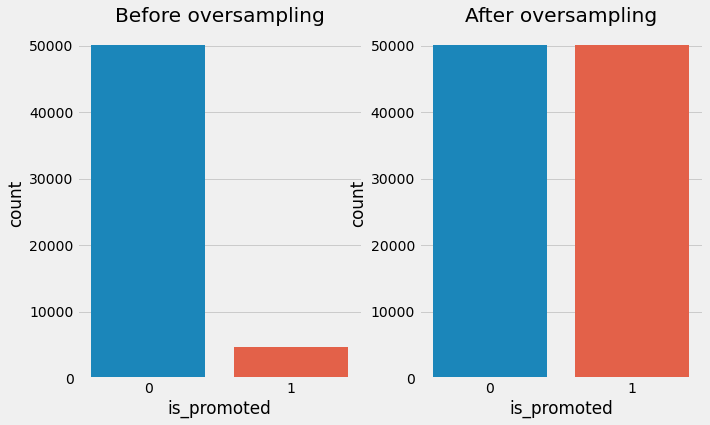

In [53]:
plt.figure(figsize=(10,6))
plt.subplot(121)
sns.countplot(y)
plt.title('Before oversampling')
plt.subplot(122)
sns.countplot(y_resample)
plt.title('After oversampling')

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x_resample,y_resample,test_size=0.3,random_state=10)

In [55]:
print('Shape of x_train {}'.format(x_train.shape))
print('Shape of y_train {}'.format(y_train.shape))
print('Shape of x_test {}'.format(x_test.shape))
print('Shape of y_test {}'.format(y_test.shape))

Shape of x_train (70196, 9)
Shape of y_train (70196,)
Shape of x_test (30084, 9)
Shape of y_test (30084,)


In [31]:
def decisionTree(x_train, x_test, y_train, y_test):
    dt=DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    yPred = dt.predict(x_test)
    print('***DecisionTreeClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classification report')
    print(classification_report(y_test,yPred))

In [32]:
def randomForest(x_train, x_test, y_train, y_test):
    rf = RandomForestClassifier()
    rf.fit(x_train,y_train)
    yPred = rf.predict(x_test)
    print('***RandomForestClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classification report')
    print(classification_report(y_test,yPred))

In [33]:
def KNN(x_train, x_test, y_train, y_test):
    knn = KNeighborsClassifier()
    knn.fit(x_train,y_train)
    yPred = knn.predict(x_test)
    print('***KNeighborsClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classification report')
    print(classification_report(y_test,yPred))

In [34]:
def xgboost(x_train, x_test, y_train, y_test):
    xg = GradientBoostingClassifier()
    xg.fit(x_train,y_train)
    yPred = xg.predict(x_test)
    print('***GradientBoostingClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classification report')
    print(classification_report(y_test,yPred))

In [35]:
def compareModel(x_train, x_test, y_train, y_test):
    decisionTree(x_train, x_test, y_train, y_test)
    print('-'*100)
    randomForest(x_train, x_test, y_train, y_test)
    print('-'*100)
    KNN(x_train, x_test, y_train, y_test)
    print('-'*100)
    xgboost(x_train, x_test, y_train, y_test)

In [36]:
compareModel(x_train, x_test, y_train, y_test)

***DecisionTreeClassifier***
Confusion matrix
[[13816  1249]
 [  848 14171]]
Classification report
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     15065
           1       0.92      0.94      0.93     15019

    accuracy                           0.93     30084
   macro avg       0.93      0.93      0.93     30084
weighted avg       0.93      0.93      0.93     30084

----------------------------------------------------------------------------------------------------
***RandomForestClassifier***
Confusion matrix
[[14180   885]
 [  738 14281]]
Classification report
              precision    recall  f1-score   support

           0       0.95      0.94      0.95     15065
           1       0.94      0.95      0.95     15019

    accuracy                           0.95     30084
   macro avg       0.95      0.95      0.95     30084
weighted avg       0.95      0.95      0.95     30084

-----------------------------------------------

In [56]:
# Random forest model is selected

rf = RandomForestClassifier()
rf.fit(x_train,y_train)
yPred = rf.predict(x_test)

In [57]:
cv = cross_val_score(rf,x_resample,y_resample,cv=5)
np.mean(cv)

0.9455524531312325

In [39]:
pickle.dump(rf,open('model.pkl','wb'))